# Description
Counting number of infected cells from trackmate .csv files for VACV dataset and different variations.

In [1]:
import os
import numpy as np

CSV_ROOT = "../dataset/plaques-ashkan/trackmate_output/dVGF_dF11_viruses/M061"
# include only files in range of 1 to 15 in their names, these are basic WR files
csv_files = [f for f in os.listdir(CSV_ROOT) if f.endswith(".csv") and int(f.split("-")[0]) in range(1, 16)]
csv_files

['5-spots.csv',
 '8-spots.csv',
 '3-spots.csv',
 '11-spots.csv',
 '4-spots.csv',
 '9-spots.csv',
 '2-spots.csv',
 '10-spots.csv',
 '7-spots.csv',
 '15-spots.csv',
 '1-spots.csv',
 '13-spots.csv',
 '6-spots.csv',
 '14-spots.csv',
 '12-spots.csv']

In [2]:
import pandas as pd

f = csv_files[0]
df = pd.read_csv(os.path.join(CSV_ROOT, f), skiprows=[1, 2, 3], low_memory=False)
df

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MEAN_INTENSITY_CH2,MEDIAN_INTENSITY_CH2,MIN_INTENSITY_CH2,MAX_INTENSITY_CH2,TOTAL_INTENSITY_CH2,STD_INTENSITY_CH2,CONTRAST_CH1,SNR_CH1,CONTRAST_CH2,SNR_CH2
0,ID1368084,1368084,0,20.965668,1132.382298,780.356352,0.0,1800.028198,3,7.5,...,282.285714,283.0,260.0,309.0,5928.0,14.318320,0.077051,0.881778,0.001791,0.070497
1,ID1368340,1368340,0,25.752502,1157.079462,775.730682,0.0,9000.140991,15,7.5,...,277.142857,275.0,256.0,316.0,5820.0,15.428175,0.091717,0.911128,-0.010782,-0.391579
2,ID1377044,1377044,0,42.847717,1294.895209,694.547675,0.0,45600.714355,76,7.5,...,275.857143,273.0,258.0,318.0,5793.0,13.857437,0.165093,1.519173,-0.012525,-0.505008
3,ID1402388,1402388,0,58.139587,1333.355436,690.772999,0.0,64201.005737,107,7.5,...,270.904762,271.0,226.0,306.0,5689.0,19.725376,0.131947,0.798678,-0.009602,-0.266313
4,ID1369622,1369622,0,35.548706,1228.790624,742.486112,0.0,24600.385376,41,7.5,...,280.619048,280.0,239.0,320.0,5893.0,17.451293,0.163113,1.846426,0.006965,0.222459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164842,ID1526591,1526591,3411,7.407532,1841.091991,576.897244,0.0,100201.569702,167,7.5,...,264.571429,266.0,228.0,300.0,5556.0,19.548840,0.027928,0.681296,-0.005381,-0.146443
164843,ID1526918,1526918,3412,89.635193,1436.313577,793.613282,0.0,100201.569702,167,7.5,...,274.476190,276.0,245.0,310.0,5764.0,17.258676,0.274862,1.112026,0.000868,0.027591
164844,ID1529948,1529948,3412,86.396545,1434.754063,790.276014,0.0,99601.560303,166,7.5,...,268.571429,263.0,242.0,314.0,5640.0,20.670199,0.233184,1.008131,-0.015853,-0.418586
164845,ID1531024,1531024,3413,7.679626,28.965211,1341.542603,0.0,99601.560303,166,7.5,...,278.285714,281.0,244.0,304.0,5844.0,15.646542,0.031930,0.701642,0.001841,0.065354


In [12]:
import matplotlib.pyplot as plt
df = df.sort_values(by=["FRAME", "TRACK_ID"])
new_track_ids = df.groupby("FRAME")["TRACK_ID"].diff().fillna(1).ne(0).astype(int)
new_track_ids_count = new_track_ids.groupby(df["FRAME"]).sum()
new_track_ids_count
# .plot(kind="bar")
# plt.show()

FRAME
0         9
1         9
2        10
3        10
4        12
       ... 
164    2924
165    2948
166    2974
167    2999
168    2941
Name: TRACK_ID, Length: 169, dtype: int64

In [15]:
import matplotlib.pyplot as plt
trackid_count = df.groupby("FRAME")["TRACK_ID"].nunique()
trackid_count.plot(figsize=(12,8))
plt.show()

FRAME
0         9
1         9
2        10
3        10
4        12
       ... 
164    2924
165    2948
166    2974
167    2999
168    2941
Name: TRACK_ID, Length: 169, dtype: int64


In [21]:
unique_track_id_counts = []

for file in csv_files:
    df = pd.read_csv(os.path.join(CSV_ROOT, file), skiprows=[1, 2, 3], low_memory=False)
    unique_counts = df.groupby('FRAME')['TRACK_ID'].nunique()
    print(unique_counts)
    unique_track_id_counts.append(unique_counts)

FRAME
0         9
1         9
2        10
3        10
4        12
       ... 
164    2924
165    2948
166    2974
167    2999
168    2941
Name: TRACK_ID, Length: 169, dtype: int64
FRAME
0         3
1         3
2         4
3         4
4         4
       ... 
164    1146
165    1159
166    1178
167    1198
168    1184
Name: TRACK_ID, Length: 169, dtype: int64
FRAME
0         9
1        13
2        13
3        15
4        14
       ... 
164    1944
165    1967
166    1988
167    2021
168    1992
Name: TRACK_ID, Length: 169, dtype: int64
FRAME
0        11
1        13
2        14
3        14
4        14
       ... 
164    2152
165    2170
166    2209
167    2241
168    2198
Name: TRACK_ID, Length: 169, dtype: int64
FRAME
0        11
1        12
2        12
3        13
4        14
       ... 
164    1648
165    1672
166    1696
167    1724
168    1702
Name: TRACK_ID, Length: 169, dtype: int64
FRAME
0        11
1        11
2        12
3        13
4        13
       ... 
164    1547
165    157

In [22]:
# Concatenate the list of Series into a single DataFrame
all_counts_df = pd.concat(unique_track_id_counts, axis=1)

# Calculate average and standard deviation for each frame
average_counts = all_counts_df.mean(axis=1)
std_dev_counts = all_counts_df.std(axis=1)

In [23]:
all_counts_df

,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID,TRACK_ID
FRAME,,,,,,,,,,,,,,,
0,9,3,9,11,11,11,15,42,10,41,15,11,3,8,26
1,9,3,13,13,12,11,16,47,10,43,15,13,3,8,27
2,10,4,13,14,12,12,16,47,9,42,16,13,3,9,27
3,10,4,15,14,13,13,15,49,10,44,18,14,3,9,28
4,12,4,14,14,14,13,17,53,10,46,18,15,3,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2924,1146,1944,2152,1648,1547,2258,3001,1716,2371,2104,1532,966,1153,3800
165,2948,1159,1967,2170,1672,1575,2284,3022,1743,2396,2133,1547,982,1163,3820
166,2974,1178,1988,2209,1696,1579,2324,3049,1766,2421,2155,1555,1006,1176,3850


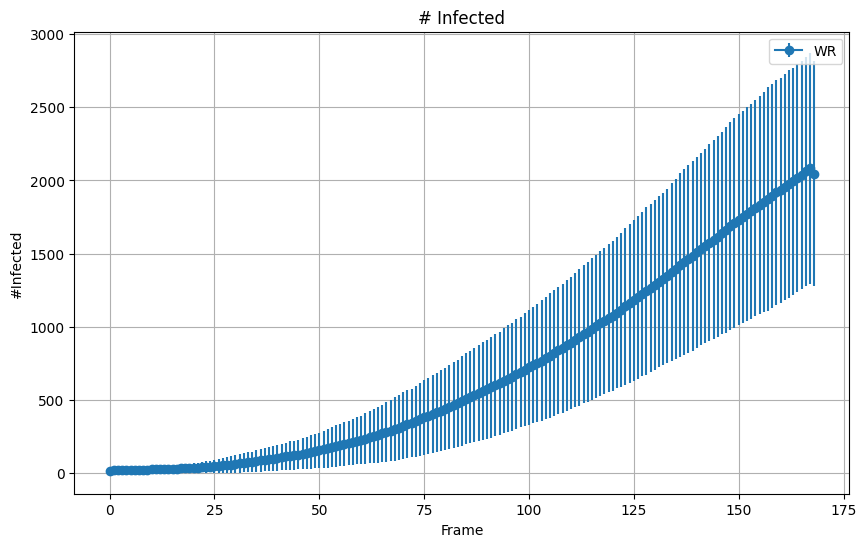

In [25]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(average_counts.index, average_counts, yerr=std_dev_counts, fmt='o-', label='WR')
plt.xlabel('Frame')
plt.ylabel('#Infected')
plt.title('# Infected')
plt.legend()
plt.grid(True)
plt.show()
